In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import plotting as pl
import chi2_stats as chistat 
import scipy.optimize as opt

Welcome to ROOTaaS 6.06/05


In [2]:
path = '/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/differential_recoMatrices/'
N_Pt_pred_BSM1 = np.load(path+'N_reco_pred_genPt_BSM1.npy')
N_Pt_pred_SM = np.load(path+'N_reco_pred_genPt_SM.npy')
N_Pt_true_BSM1 = np.load(path+'N_reco_true_genPt_BSM1.npy')
N_Pt_true_SM = np.load(path+'N_reco_true_genPt_SM.npy')

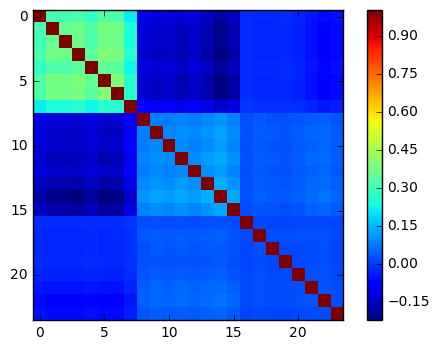

sigma_mu =  [ 0.739  0.603  0.688  0.63   0.664  0.54   0.519  0.592  0.648  0.524
  0.604  0.545  0.629  0.574  0.615  0.985  0.952  0.617  0.8    0.8    0.703
  0.614  0.724  1.22 ]


In [3]:
rho = np.load(path+'RHO.npy')
sigma_mu = np.array([7.39e-01, 6.48e-01, 9.52e-01, 6.03e-01, 5.24e-01,
6.17e-01, 6.88e-01, 6.04e-01, 8.00e-01, 6.30e-01, 
5.45e-01, 8.00e-01, 6.64e-01, 6.29e-01, 7.03e-01,
5.40e-01, 5.74e-01, 6.14e-01, 5.19e-01, 6.15e-01, 
7.24e-01, 5.92e-01, 9.85e-01, 1.22e+00
                    ])
#do not forget to order per category
sigma_mu = pl.OrderPerCategory(array=sigma_mu,n=3)

plt.imshow(rho,interpolation='nearest')
plt.colorbar()
plt.show()
print 'sigma_mu = ', sigma_mu

#### normalize w.r.t. the sum of columns in order to get to the response $K$


In [4]:
K_Pt_pred_BSM1 = N_Pt_pred_BSM1 / np.sum(N_Pt_pred_BSM1,axis=0)

#### obtain the covariance matrix $C$ from the correlation matrix $\rho$

[ 0.49047887  0.56944919  0.36917156  0.53527182  0.21598095  0.20071761
  0.14241185  0.04493403  0.78692496  0.92725855  0.65319061  0.80430713
  0.30311066  0.22846061  0.11060176  0.02907295  1.67043179  1.90469438
  1.26859343  1.62583515  0.61883     0.40418018  0.15748004  0.02634094]
[ 0.36246389  0.34337786  0.25399003  0.33722125  0.14341135  0.10838751
  0.07391175  0.02660095  0.50992737  0.48588348  0.39452713  0.43834739
  0.1906566   0.13113639  0.06802008  0.02863685  1.59025107  1.17519643
  1.01487474  1.30066812  0.43503749  0.24816663  0.11401555  0.03213595]
max C:  2.52889845509
det C:  4.81978963449e-32
True
True
conditional C 4184.74333258
True


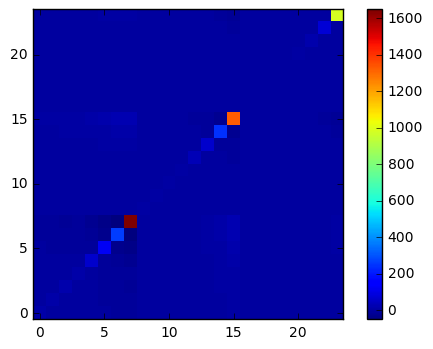

In [5]:
reload(chistat)
C_inv = chistat.GetInverseCovariance(sigma_mu=sigma_mu,
                            N_true_SM = np.sum(N_Pt_true_SM,axis=1)[1:],
                             corr=rho
                            )

plt.imshow(C_inv,interpolation='nearest',origin='lower')
plt.colorbar()
plt.show()

# First naive check:

### $$
\lambda( \vec{N}) \approx \chi^2 = \left(\vec{N}  - \vec{N}_{\mathrm{true,reco}}^{\mathrm{BSM}} \right)^{\mathrm{T}} C^{-1} \left(\vec{N} -  \vec{N}_{\mathrm{true,reco}}^{\mathrm{BSM}} \right)
$$

The best fit $\hat{\vec{N}}$ should per definition coincide with $\vec{N}_{\mathrm{true,reco}}^{\mathrm{BSM}}$

In [6]:
initial_guess = np.ones(len(np.sum(N_Pt_true_BSM1,axis=1)[1:]))
print 'initial guess :', initial_guess
N_true_BSM1 = np.sum(N_Pt_true_BSM1,axis=1)[1:]

best_fit = opt.minimize(fun=chistat.chi2N,
                       x0=initial_guess,
                       args=(N_true_BSM1, C_inv),
                        method=None,
                        #hess=C_inv
                       )

initial guess : [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.]


In [7]:
N_best_fit = best_fit.x

In [8]:
print 'true BSM reco', N_true_BSM1
print 'best fit BSM', N_best_fit

print 'difference'
print N_true_BSM1 - N_best_fit

true BSM reco [  2.23332214e+00   6.32385540e+00   9.20367908e+00   2.42015285e+01
   1.56938362e+01   1.39133494e+01   6.09334278e+00   6.24650568e-02
   3.95348549e+00   1.08758030e+01   1.44759598e+01   3.66045361e+01
   2.27565584e+01   1.64514012e+01   4.17335415e+00   1.88483894e-02
   5.92569256e+00   1.59508848e+01   2.21349716e+01   5.34682903e+01
   3.17545815e+01   2.12193933e+01   4.10807456e+00   5.11837453e-02]
best fit BSM [  2.23332209e+00   6.32385535e+00   9.20367905e+00   2.42015285e+01
   1.56938362e+01   1.39133494e+01   6.09334276e+00   6.24650471e-02
   3.95348547e+00   1.08758030e+01   1.44759598e+01   3.66045361e+01
   2.27565584e+01   1.64514012e+01   4.17335414e+00   1.88483835e-02
   5.92569185e+00   1.59508849e+01   2.21349716e+01   5.34682905e+01
   3.17545814e+01   2.12193932e+01   4.10807455e+00   5.11837385e-02]
difference
[  4.90463505e-08   5.34048414e-08   3.92586532e-08   5.43372529e-08
   2.47005705e-08   2.28076900e-08   1.78375874e-08   9.6355725

# Main Analysis

## Idea: write $\vec{N} = K \cdot \Delta \vec{\sigma} \mathcal{L}$ and write the $\chi^2$ as a function of the fiducial cross section in each generator level bin and do the unfolding by finding the best fit for $\Delta \vec{\sigma}$


### $$
\lambda( \Delta \vec{\sigma}) \approx \chi^2 = \left(K \cdot \Delta \vec{\sigma} \mathcal{L}  - \vec{N}_{\mathrm{true,reco}}^{\mathrm{BSM}} \right)^{\mathrm{T}} C^{-1} \left(K \cdot \Delta \vec{\sigma} \mathcal{L} - \vec{N}_{\mathrm{true,reco}}^{\mathrm{BSM}} \right)
$$

In [9]:
initial_guess = np.ones(len(np.sum(K_Pt_pred_BSM1,axis=0)))
print initial_guess


best_fit = opt.minimize(fun=chistat.chi2,
                       x0=initial_guess,
                       args=(K_Pt_pred_BSM1[1:,:], np.sum(N_Pt_true_BSM1,axis=1)[1:], C_inv),
                        method=None,
                        #hess=C_inv
                       )


[ 1.  1.  1.  1.  1.  1.  1.  1.]


In [10]:
DeltaSigma_BF = best_fit.x
print 'best fit cross section: \n', DeltaSigma_BF

best fit cross section: 
[  14.71511245   42.35724017   58.02380134  149.2136443    91.37522289
   64.55572295   18.31204872   -0.19426392]


In [12]:
lambda_BF = chistat.chi2(Delta_sigma=DeltaSigma_BF,
           response=K_Pt_pred_BSM1[1:,:], #take out not-reco row 
           N_true=np.sum(N_Pt_true_BSM1,axis=1)[1:], 
           invCov=C_inv)
print lambda_BF

224.695977835


# Do the scanning

#### There is probably something wrong :-(

In [18]:
profiles = []
N_profiles = 200
initial_guess = np.ones(len(np.sum(K_Pt_pred_BSM1,axis=0)))
for i,sigma_k in enumerate(DeltaSigma_BF) :
    sigma_k_range = np.linspace(0.5*sigma_k,1.5*sigma_k,N_profiles)
    lam_sigma = []
    for s in sigma_k_range :    
        optim = opt.minimize(fun=chistat.chi2_fixOneComp,
                               x0=initial_guess,
                               args=(K_Pt_pred_BSM1[1:,:], np.sum(N_Pt_true_BSM1,axis=1)[1:], C_inv, [i,s]),
                                method=None,
                                hess=C_inv
                               ) 
        lam_sigma.append(
            chistat.chi2(Delta_sigma=optim.x,
           response=K_Pt_pred_BSM1[1:,:], #take out not-reco row 
           N_true=np.sum(N_Pt_true_BSM1,axis=1)[1:], 
           invCov=C_inv)
        )
        """print i
        print s
        print (chi2(Delta_sigma=DeltaSigma_BF,
           response=K_Pt_pred_BSM1[1:,:], #take out not-reco row 
           N_true=np.sum(N_Pt_true_BSM1,axis=1)[1:], 
           invCov=C_inv)
               )
        #print optim.x
        print DeltaSigma_BF
        print optim.x
        print "---------"
        """
    #print lam_sigma
    profiles.append(lam_sigma)
    #print profiles
    #print '+++++++++++++++++++++++++++++++++++++'

[ 14.10876108  15.2918857 ]
16.2679080963


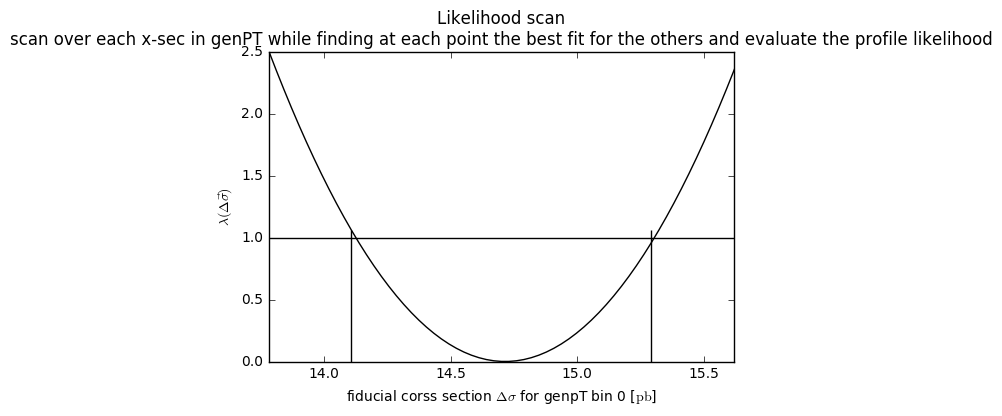

[ 41.803829    42.82551117]
45.4139099121


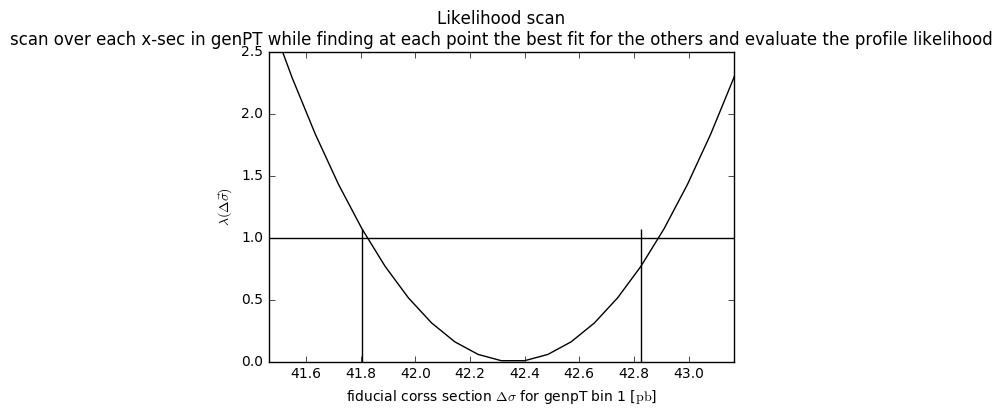

[ 57.49896294  58.43200899]
60.2505531311


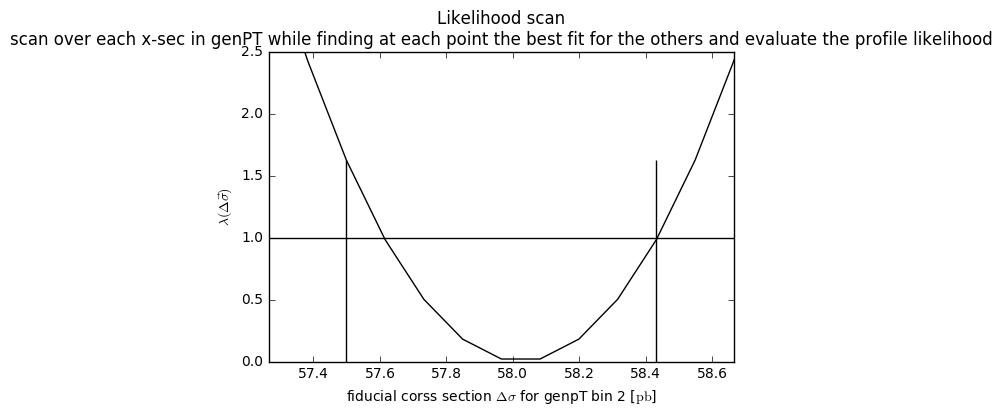

[ 148.46382699  149.66353469]
152.629196167


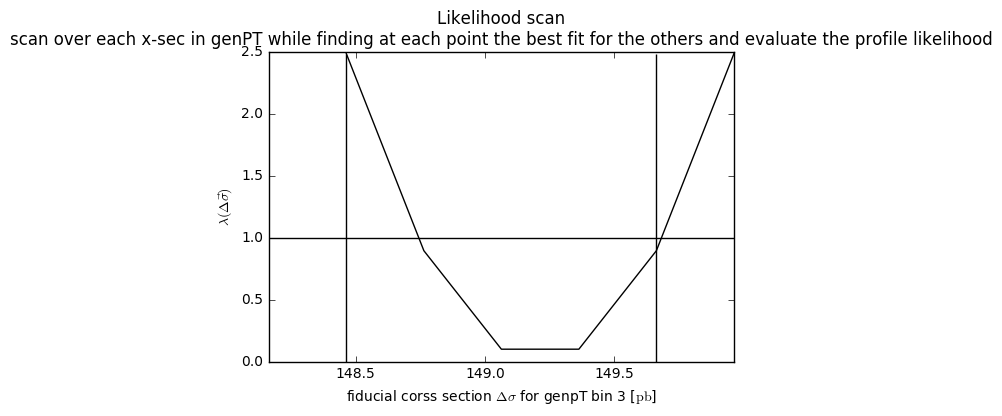

[ 91.0997197   91.46705728]
93.1448287964


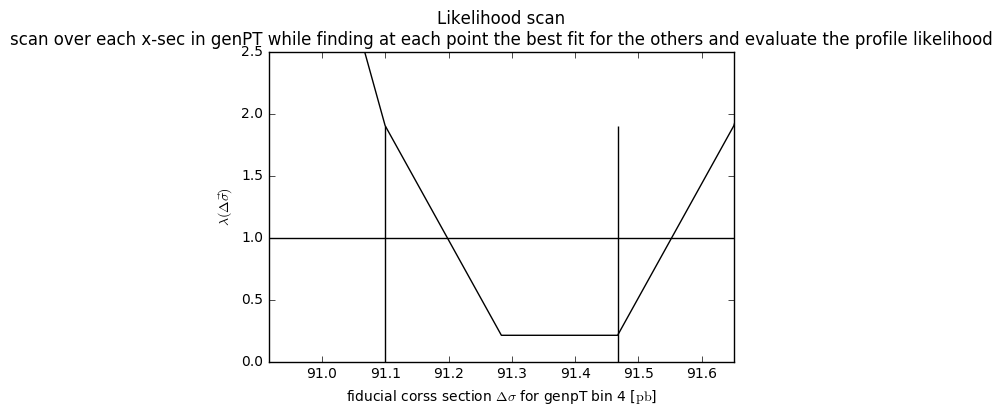

[ 64.36108258  64.62060307]
67.0966720581


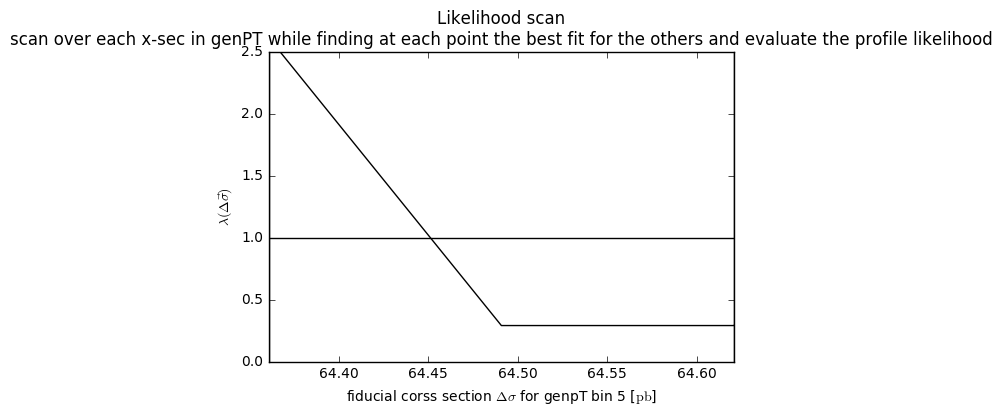

[ 18.22002838  18.36726093]
17.2883603573


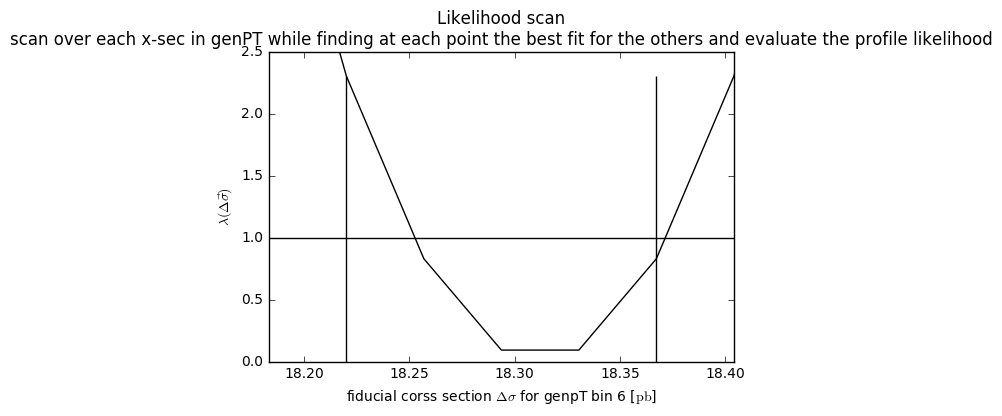

[-0.16790651 -0.22023086]
0.205780372024


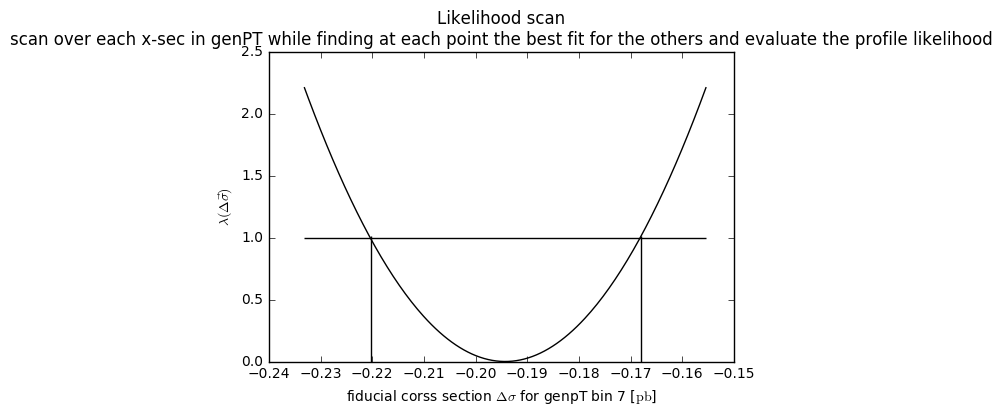

In [19]:
yMax = 2.5
line_2p5 = np.zeros(N_profiles)+yMax
line_1 = np.zeros(N_profiles)+1.


sigma_fid_true = np.sum(N_Pt_true_BSM1,axis=0)

for i,sigma_k in enumerate(DeltaSigma_BF) :
    sigma_k_range = np.linspace(0.8*sigma_k,1.2*sigma_k,N_profiles)
    plt.plot(sigma_k_range,profiles[i]-lambda_BF,'k')
    plt.title('Likelihood scan'+'\n'+'scan over each x-sec in genPT while finding at each point the best fit for the others and evaluate the profile likelihood')
    plt.xlabel(r'fiducial corss section $\Delta \sigma$ for genpT bin '+str(i)+r' [$\mathrm{pb}$]' )
    plt.ylabel(r'$\lambda(\Delta \vec{\sigma})$')
    
    plt.ylim(0.,yMax)
    idx2 = np.argwhere(np.diff(np.sign(profiles[i]-lambda_BF - line_2p5)) != 0).reshape(-1) + 0
    idx1 = np.argwhere(np.diff(np.sign(profiles[i]-lambda_BF - line_1)) != 0).reshape(-1) + 0
    print sigma_k_range[idx1]
    plt.xlim(*sigma_k_range[idx2])
    plt.hlines(1.0,sigma_k_range[0],sigma_k_range[-1],color='k')
    plt.vlines(sigma_k_range[idx1][0],0.,np.array(profiles[i])[idx1]-lambda_BF)
    plt.vlines(sigma_k_range[idx1][1],0.,np.array(profiles[i])[idx1]-lambda_BF)
    
    print sigma_fid_true[i]
    #plt.vlines(sigma_fid_true[i],0.,yMax,'r')
    #plt.plot(sigma_k_range[idx1],np.array(profiles[i])[idx1]-lambda_BF, 'ro')
    plt.show()